In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from synthetic import generate
from models.ckan import cKAN, train_model_ckan

In [8]:
lag = 4  # number of lags
T = 1000  # number of time points
num_series = 4  # number of time series

batch_size = 32
epochs = 20
lr = 1e-3
sparsity = 0.8

dim_input = num_series * lag
dim_output = 1

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
X_np = generate(sig_to_noise=1)
# transfer dataframe to tensor 
X_np = torch.tensor(X_np.values, dtype=torch.float32).to(device)
# X_np.shape

# add one new dimension to the tensor
X = X_np.unsqueeze(0)
X.shape

torch.Size([1, 1000, 4])

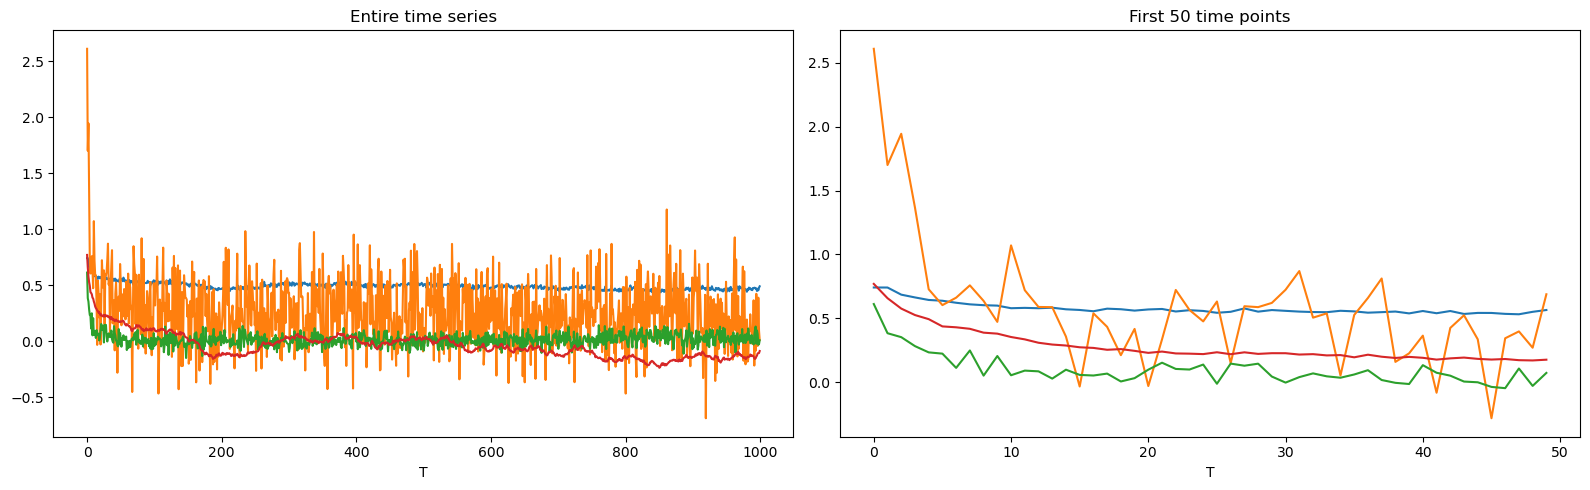

In [7]:
# Plot data
fig, axarr = plt.subplots(1, 2, figsize=(16, 5))
axarr[0].plot(X_np)
axarr[0].set_xlabel('T')
axarr[0].set_title('Entire time series')
axarr[1].plot(X_np[:50])
axarr[1].set_xlabel('T')
axarr[1].set_title('First 50 time points')
plt.tight_layout()
plt.show()

## Create cKAN and Train

In [10]:
# setup the model
hidden = [num_series*lag, 32, 1]
ckan = cKAN(num_series, lag, hidden, prun_th=0.001)
result = train_model_ckan(ckan, X, max_iter=100)

| train_loss: 9.90e-02 | test_loss: 9.90e-02 | reg: 5.85e+01 | : 100%|█| 100/100 [00:50<00:00,  1.98
| train_loss: 1.34e-02 | test_loss: 1.34e-02 | reg: 3.67e+00 | : 100%|█| 100/100 [01:18<00:00,  1.28
| train_loss: 1.04e-01 | test_loss: 1.04e-01 | reg: 6.25e+01 | : 100%|█| 100/100 [00:56<00:00,  1.77
| train_loss: 2.75e-02 | test_loss: 2.75e-02 | reg: 4.04e+00 | : 100%|█| 100/100 [01:21<00:00,  1.22


Text(0.5, 1.0, 'Loss function')

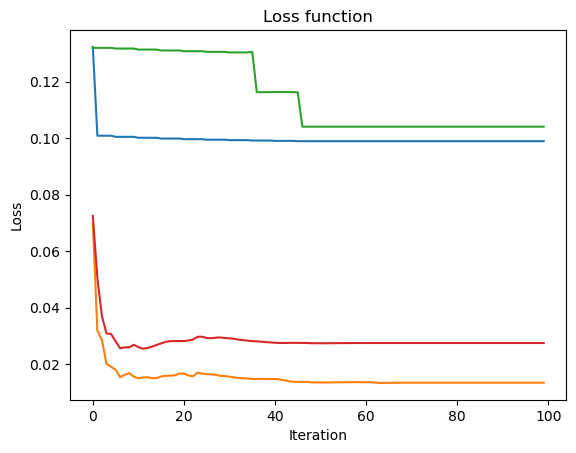

In [11]:
# plot loss
plt.plot(result)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss function')

[[2.0677309e+00 1.7214890e+01 2.7632365e+00 5.3971605e+00]
 [6.3338499e-03 1.0728441e+00 1.1677547e-02 2.0997884e-02]
 [2.2839432e+00 1.8595695e+01 3.0763235e+00 5.9368520e+00]
 [1.8274823e-01 3.2384199e-01 1.0125523e-01 6.9273698e-01]]


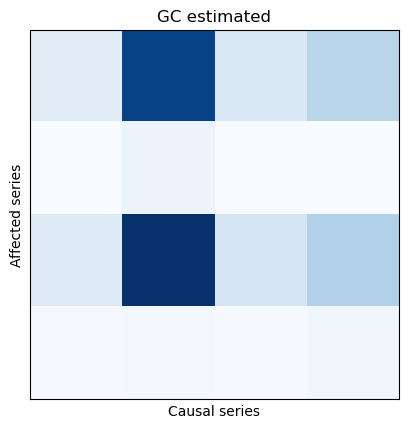

In [12]:
scores = ckan.get_scores()
print(scores)

# plot the heatmap of the GC matrix
plt.figure()
plt.imshow(scores, cmap='Blues')
plt.title('GC estimated')
plt.ylabel('Affected series')
plt.xlabel('Causal series')
plt.xticks([])
plt.yticks([])
plt.show()

True Granger

x: |1|0|0|1|

y: |1|0|0|1|

p: |0|0|0|1|

z: |0|0|0|1|

-: |x|y|p|z|